# Import the necessary libraries

In [16]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Read the dataset

In [17]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Scatter plot the income

Text(0,0.5,'Income($)')

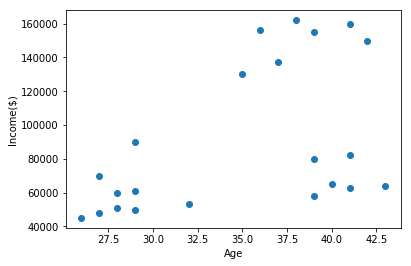

In [18]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [19]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[2 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 0]


In [20]:
df['cluster']=y_predicted
print(df.head())

      Name  Age  Income($)  cluster
0      Rob   27      70000        2
1  Michael   29      90000        2
2    Mohan   29      61000        0
3   Ismail   28      60000        0
4     Kory   42     150000        1


# Cluster centers

In [21]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

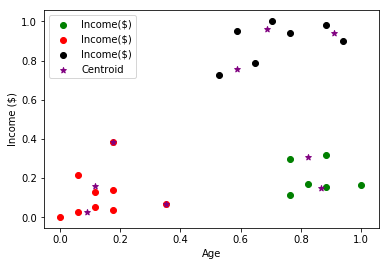

In [36]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

# Preprocessing using min max scaler

In [23]:
scaler=MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
print(df.head())

      Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        2
1  Michael  0.176471   0.384615        2
2    Mohan  0.176471   0.136752        0
3   Ismail  0.117647   0.128205        0
4     Kory  0.941176   0.897436        1


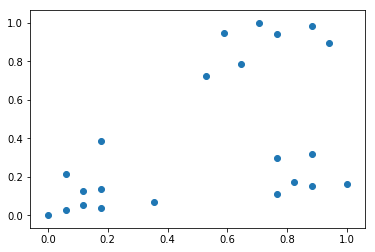

In [24]:
plt.scatter(df.Age,df['Income($)'])

In [25]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
print(y_pred)

[1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0]


In [26]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [27]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

# Plotting preprocessed data

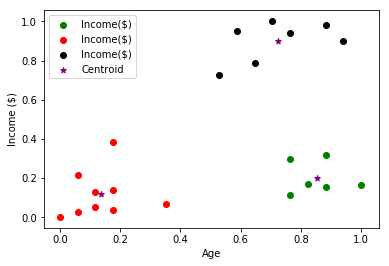

In [28]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Ploting the Sum of Squared Error

In [29]:
see=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    see.append(km.inertia_)
print(see)

[5.434011511988179, 2.091136388699078, 0.4750783498553095, 0.3491047094419565, 0.2621792762345213, 0.22443334487241418, 0.16858512236029757, 0.14964408423470027, 0.10188787724979426]


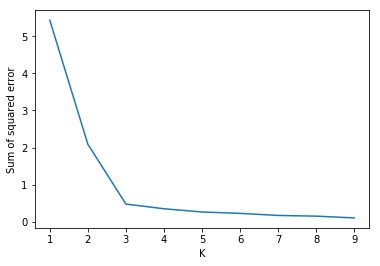

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,see)